# Super store

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, SMOOTHERS
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


**Uploading the data**

**Task1**

In [60]:
df = pd.read_csv('DS3_C1_S3_SuperstoreSales_Data_Challenge.csv')

In [61]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
cpdf = df.copy()

In [14]:
cpdf['Order Date'] = pd.to_datetime(cpdf["Order Date"],format='mixed')
cpdf=cpdf.set_index("Order Date")

In [15]:
cpdf.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
cpdf.sort_index(inplace=True)

In [17]:
cpdf.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-02,541,CA-2014-140795,03-02-2014,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,6,0.0,206.3160
2014-01-03,6548,CA-2014-113880,05-03-2014,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172
2014-01-03,7949,CA-2014-131009,05-03-2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.3,0.0000
2014-01-03,7950,CA-2014-131009,05-03-2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.6,-34.9536
2014-01-03,5714,US-2014-143707,05-03-2014,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,3,0.0,1.6038


In [18]:
cpdf = cpdf['Sales'].resample('M').mean()
#resample by Month

In [19]:
cpdf.head()

Order Date
2014-01-31    221.020656
2014-02-28    148.175674
2014-03-31    326.201821
2014-04-30    204.215008
2014-05-31    200.269149
Freq: M, Name: Sales, dtype: float64

In [20]:
# missing values
cpdf.isnull().sum()

0

In [21]:
# outlier visual

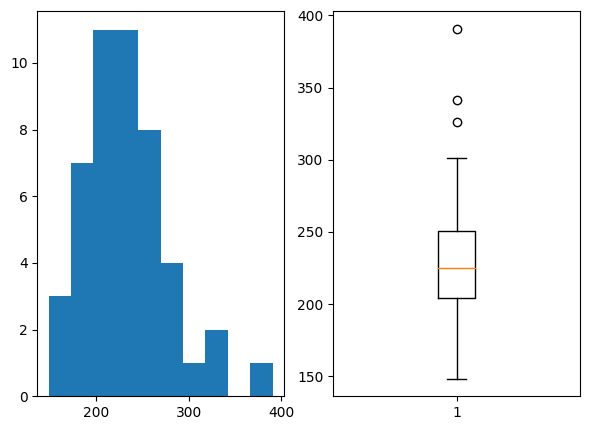

In [22]:
fig,ax=plt.subplots(1,2,figsize=(7,5))
ax=ax.ravel()
ax[0].hist(cpdf)
ax[1].boxplot(cpdf)
plt.show()

In [23]:
# outlier detected

In [24]:
decomposition=seasonal_decompose(cpdf,period=12)
decomposition

In [25]:
trend=decomposition.trend
sesonal=decomposition.seasonal
residual=decomposition.resid

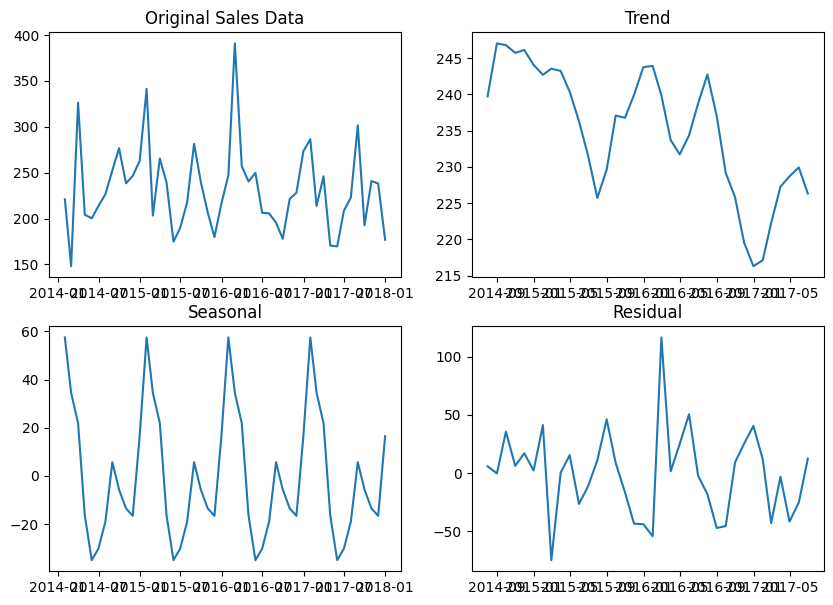

In [26]:
fig,ax=plt.subplots(2,2,figsize=(10,7))
ax=ax.ravel()
ax[0].plot(cpdf)
ax[0].set_title('Original Sales Data')
ax[1].plot(trend,data=cpdf)
ax[1].set_title('Trend')
ax[2].plot(sesonal,data=cpdf)
ax[2].set_title('Seasonal')
ax[3].plot(residual,data=cpdf)
ax[3].set_title('Residual')

plt.show()

**Task2**

In [18]:
# stationary

In [27]:
result = adfuller(cpdf)
p_value = result[1]

In [28]:
p_value

1.4097136094620606e-07

In [29]:
#pval<0.05 
#stationary

**Task3**

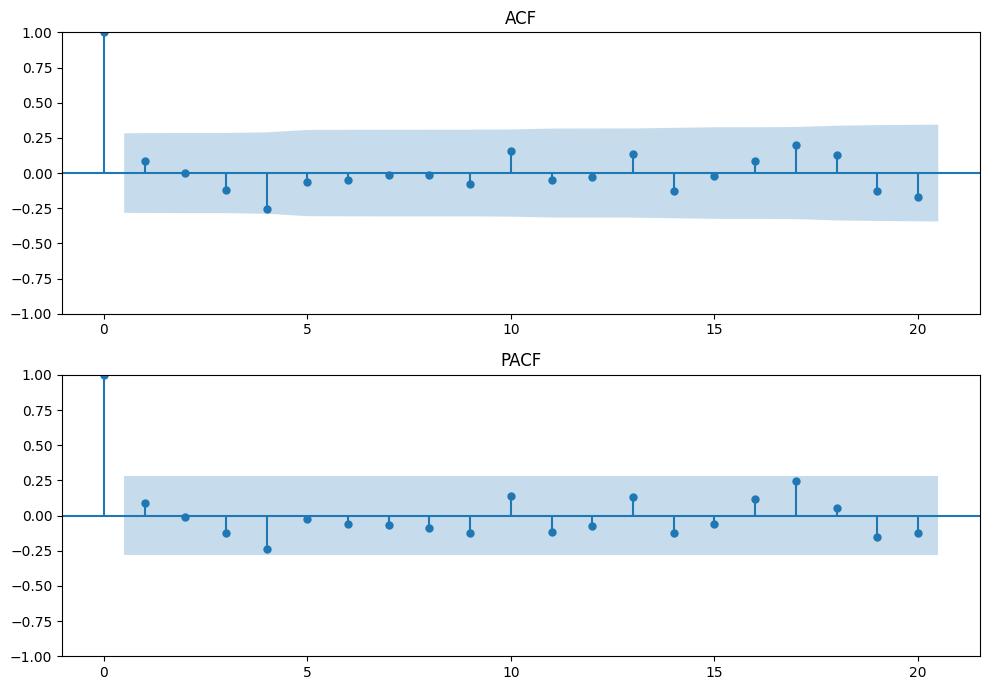

In [30]:
fig,ax = plt.subplots(nrows = 2, ncols=1, figsize = (10,7))

#acf plot
plot_acf(cpdf,lags = 20, ax=ax[0])
ax[0].set_title('ACF')

#pacf plot
plot_pacf(cpdf, lags=20,ax=ax[1])
ax[1].set_title('PACF')

plt.tight_layout()

In [63]:
split_data = int(0.7*len(cpdf))
train_data = cpdf.iloc[:split_data]
test_data =  cpdf.iloc[split_data:]

In [64]:
train_data.shape

(33,)

In [37]:
# AR model

In [38]:
d=0
q=0
aic_val=[]
for p in range(1,10):
    ar_m=sm.tsa.ARIMA(train_data,order=(p,d,q)).fit()
    aic_val.append(ar_m.aic)
min_aic=min(aic_val)
p_val=aic_val.index(min_aic)+1

In [39]:
p_val

1

In [40]:
lb_p_value=acorr_ljungbox(ar_m.resid,lags=[1],return_df=True)
lb_p_value

,lb_stat,lb_pvalue
1,0.052586,0.818623


In [41]:
# ib_pvalue>0.05
# AR(1) is the good model and has no correlation

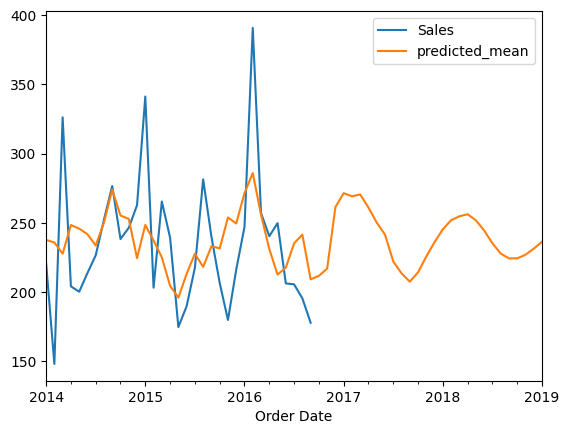

In [42]:
train_data.plot()
ar_m.predict(start=0,end=60).plot()
plt.legend()
plt.show()

In [43]:
# MA model

In [44]:
d=0
p=0
aic_val1=[]
for q in range(1,10):
    ar_m1=sm.tsa.ARIMA(train_data,order=(p,d,q)).fit()
    aic_val1.append(ar_m1.aic)
min_aic=min(aic_val1)
q_val=aic_val1.index(min_aic)+1

In [45]:
q_val

1

In [46]:
lb_p_value=acorr_ljungbox(ar_m1.resid,lags=[1],return_df=True)
lb_p_value

,lb_stat,lb_pvalue
1,0.011253,0.915518


In [47]:
# ib_pvalue>0.05
# MA(1) is the good model and has no correlation

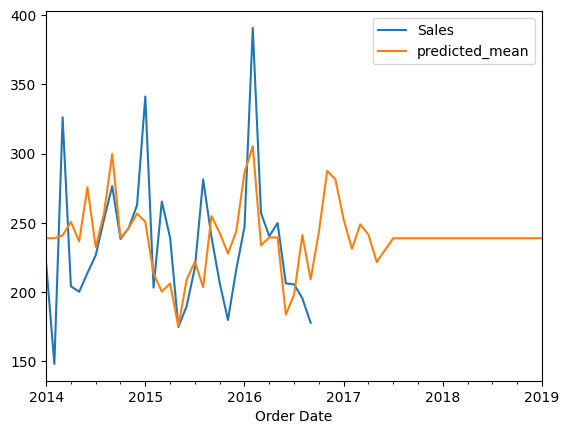

In [48]:
train_data.plot()
ar_m1.predict(start=0,end=60).plot()
plt.legend()
plt.show()

In [49]:
# MODEL
# ARMA

In [50]:
d=0
p_lis=[]
q_list=[]
for p in range(1,4):
    for q in range(1,4):
        ar_m=sm.tsa.ARIMA(train_data,order=(p,d,q)).fit()
        ar_m.aic
        print("p:",p," q:",q,ar_m.aic)

p: 1  q: 1 358.1363516274346
p: 1  q: 2 356.2056982250193
p: 1  q: 3 357.55740198683594
p: 2  q: 1 355.5952610424031
p: 2  q: 2 352.85104874375565
p: 2  q: 3 354.93453937252036
p: 3  q: 1 356.57904550615115
p: 3  q: 2 354.82400335719325
p: 3  q: 3 356.6936914518127


In [51]:
p=2
d=0
q=2
ar_m=sm.tsa.ARIMA(train_data,order=(p,d,q)).fit()
ar_m.aic

352.85104874375565

In [52]:
pred_data=ar_m.predict(0,len(test_data)-1)
pred_data

Order Date
2014-01-31    238.806865
2014-02-28    237.441175
2014-03-31    232.380801
2014-04-30    251.068213
2014-05-31    245.817686
2014-06-30    246.317400
2014-07-31    251.630076
2014-08-31    258.080998
2014-09-30    262.376869
2014-10-31    260.661414
2014-11-30    257.193226
2014-12-31    253.372695
2015-01-31    246.495425
2015-02-28    223.443111
2015-03-31    213.418432
Freq: M, Name: predicted_mean, dtype: float64

In [54]:
rmse=mean_squared_error(test_data,pred_data,squared=False)
mse=mean_squared_error(test_data,pred_data)
mae=mean_absolute_error(test_data,pred_data)
mape=mean_absolute_percentage_error(test_data,pred_data)
print("rmse:",rmse)
print("mse:",mse)
print("mae:",mae)
print("mape:",mape)

rmse: 44.93476360679104
mse: 2019.132980398192
mae: 37.22543426083232
mape: 0.18145362474926202


In [55]:
lb_p_value=acorr_ljungbox(ar_m.resid,lags=[1],return_df=True)
lb_p_value

,lb_stat,lb_pvalue
1,0.124521,0.724182


In [56]:
#pvalue>0.05 , accept the null, good model

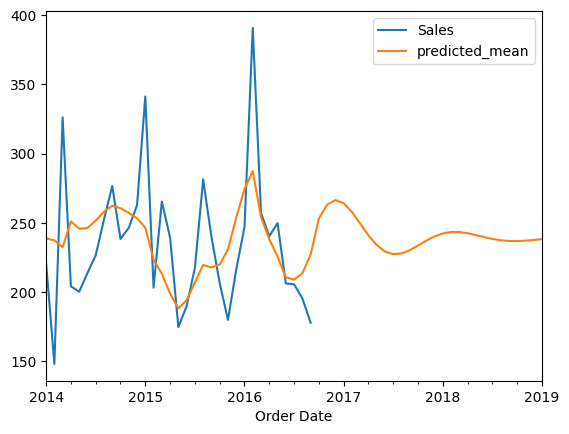

In [57]:
train_data.plot()
ar_m.predict(start=0,end=60).plot()
plt.legend()
plt.show()

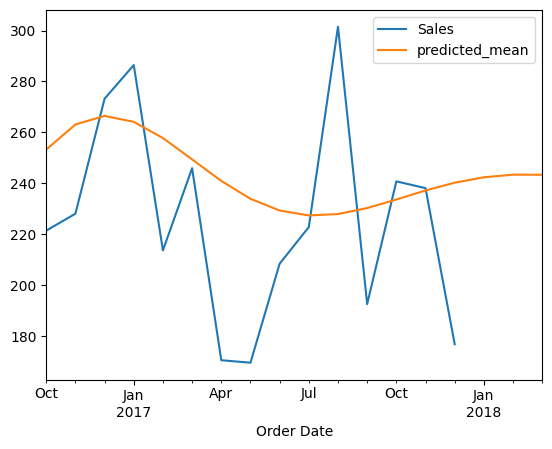

In [58]:
test_data.plot()
ar_m.predict(start=33,end=50).plot()
plt.legend()
plt.show()

In [66]:
errors = []

for val1, val2 in zip(test_data, pred_data):
    error = val1 - val2
    errors.append(error)

In [67]:
errors

[-17.33165273986603,
 -9.326550505662254,
 40.85573690555515,
 35.36679169309099,
 -32.093372454152984,
 -0.35001907740749516,
 -81.00998183339274,
 -88.44429137848937,
 -53.89509781354869,
 -37.78400649652454,
 44.30200937168132,
 -60.737349349321136,
 -5.682328630955453,
 14.706861836494284,
 -36.495463826342416]

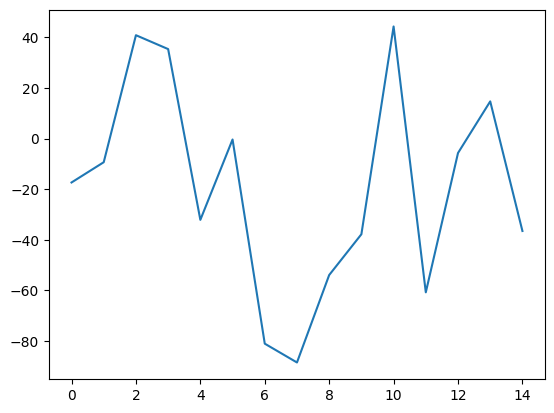

In [68]:
plt.plot(errors)